# Data Cleaning
Aqui vamos realizar toda a etapa de limpeza dos dados para nossa analise de dados



# Importando bibliotecas


In [1]:
# bibliotecas
import numpy as np
import pandas as pd
import datetime

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import altair as alt

import seaborn as sns
sns.set_style('white')


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from IPython.display import display

# Importar os conjuntos de dados

In [2]:
# importar os conjuntos de dados

# game: Reúne os registros de cada jogo no conjunto de dados
game = pd.read_csv("nhl_datasets/game.csv")

# game_golie_stats: As estatísticas dos goleiros que participaram dos jogos
game_golie_stats = pd.read_csv("nhl_datasets/game_goalie_stats.csv")

# game_teams_stats: As estatísticas básicas das equipes. Cada jogo terá duas entradas nesta tabela, uma para cada equipe
game_teams_stats = pd.read_csv("nhl_datasets/game_teams_stats.csv")

# player_info: Informações sobre os jogadores
player_info = pd.read_csv("nhl_datasets/player_info.csv")

# team_info: informação sobre as equipes
team_info = pd.read_csv("nhl_datasets/team_info.csv")


## Primeiras entradas

In [3]:
game.head(3)

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT


In [4]:
game.dtypes

game_id                    int64
season                     int64
type                      object
date_time                 object
date_time_GMT             object
away_team_id               int64
home_team_id               int64
away_goals                 int64
home_goals                 int64
outcome                   object
home_rink_side_start      object
venue                     object
venue_link                object
venue_time_zone_id        object
venue_time_zone_offset     int64
venue_time_zone_tz        object
dtype: object

In [5]:
team_info.head(3)

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26


In [6]:
team_info.dtypes

team_id          int64
franchiseId      int64
shortName       object
teamName        object
abbreviation    object
link            object
dtype: object

In [7]:
game_teams_stats.head(3)

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7


In [8]:
game_teams_stats.dtypes

game_id                     int64
team_id                     int64
HoA                        object
won                          bool
settled_in                 object
head_coach                 object
goals                       int64
shots                       int64
hits                        int64
pim                         int64
powerPlayOpportunities      int64
powerPlayGoals              int64
faceOffWinPercentage      float64
giveaways                   int64
takeaways                   int64
dtype: object

In [9]:
player_info.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
0,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412
1,8468501,Anton,Volchenkov,RUS,Moscow,D,1982-02-25,/api/v1/people/8468501
2,8459670,Kimmo,Timonen,FIN,Kuopio,D,1975-03-18,/api/v1/people/8459670
3,8471233,Travis,Zajac,CAN,Winnipeg,C,1985-05-13,/api/v1/people/8471233
4,8455710,Martin,Brodeur,CAN,Montreal,G,1972-05-06,/api/v1/people/8455710


In [10]:
player_info.dtypes

player_id           int64
firstName          object
lastName           object
nationality        object
birthCity          object
primaryPosition    object
birthDate          object
link               object
dtype: object

In [11]:
game_golie_stats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2011030221,8455710,1,3876,0,0,0,36,32,7,0,25,0,28,8,L,88.888889,87.5,89.285714
1,2011030221,8468524,4,3876,0,0,0,26,23,4,5,14,5,16,5,W,88.461538,80.0,87.500000
2,2011030222,8455710,1,3599,0,0,0,20,19,1,3,15,3,16,1,W,95.000000,100.0,93.750000
3,2011030222,8468524,4,3559,0,0,0,34,31,6,0,25,0,28,6,L,91.176471,100.0,89.285714
4,2011030223,8468524,4,4623,0,0,0,31,27,1,1,25,1,28,2,L,87.096774,50.0,89.285714


In [12]:
game_golie_stats.dtypes

game_id                         int64
player_id                       int64
team_id                         int64
timeOnIce                       int64
assists                         int64
goals                           int64
pim                             int64
shots                           int64
saves                           int64
powerPlaySaves                  int64
shortHandedSaves                int64
evenSaves                       int64
shortHandedShotsAgainst         int64
evenShotsAgainst                int64
powerPlayShotsAgainst           int64
decision                       object
savePercentage                float64
powerPlaySavePercentage       float64
evenStrengthSavePercentage    float64
dtype: object

Nosso objetivo é preparar os conjuntos de dados para as nossas analises. Algumas das etapas que vamos realizar....


# Vamos relacionar os conjuntos de dados
Os conjuntos de dados que vamos relacionar são `game` com `game_team_stats` em cima da variavel `game_id`. Nosso novo conjunto de dados vai chamar `nhl_eda`. Ele vai ser nosso conjunto de dados principal onde vamos realizar nossas analises em cima dos times. Os outros conjuntos de dados `game_skater_stats` e `game_golie_stats` vao servir paras as analises dos jogadores.

In [13]:
# game com game_teams_stats
nhl_eda = pd.merge(game, game_teams_stats, on='game_id')

In [14]:
nhl_eda.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7
3,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,False,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6
4,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT,4,away,False,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1


# Preparando os dados
As variáveis: `away_team_id`, `home_team_id`, `team_id`, `player_id` categorizam os times e os jogadores através de números únicos (*id*) como mostrado nos conjuntos de dados [`team_info`, `player_info`]. Isso deixa nossas análises menos legíveis porque sempre vamos precisar recorrer a estes conjuntos de dados para identificar seus valores. Uma alternativa para essa questão e mapear esses números identificadores aos respectivos valores e substitui-los no conjunto de dados que vamos utilizar para nossa análise exploratória.

Existem diversas formas de abordar essa questão. No meu caro criarei um dicionário com a função `to_dict()`. Onde nossa chave (*key*) será o número identificador (*id*) e os valores (*value*) o nome do time ou jogador. Para substituir os valores vamos selecionar a coluna no conjunto de dados e chamar a função `replace()` passando como parâmetro nosso dicionário.

Para o dicionário que vai conter o nome dos jogadores, vamos criar uma coluna no conjunto de dados denominada `full_name` que vai ser a junção da variável `firstName` e `lastName`. Assim nosso o número identificador vai ficar associado ao nome completo do jogador. Realizaremos esse procedimento para evitar sobrenomes (`lastName`) iguais.


**Obs:. Para não criar confusão vamos trabalhar em um conjunto de dados por vez**

## Mapeando valores

In [15]:
# Dicionário dos times
team_dict = team_info.set_index('team_id')['teamName'].to_dict()


In [16]:
# criando coluna que vai conter o primeiro e o ultimo nome
player_info['player_name'] = player_info['firstName'] + " " + player_info['lastName']

# dict onde key=player-id e value=nome
player_dict = player_info.set_index('player_id')['player_name'].to_dict()


In [17]:
# nationality game_skater_stats
nation_dict = player_info.set_index('player_id')['nationality'].to_frame()

# position game_skater_stats
position = player_info.set_index('player_id')['primaryPosition'].to_frame()

## Conjunto de Dados `nhl_eda`

### Substituindo valores

In [18]:
# Substituindo valores 
nhl_eda['team_id'].replace(team_dict, inplace=True)
nhl_eda['away_team_id'].replace(team_dict, inplace=True)
nhl_eda['home_team_id'].replace(team_dict, inplace=True)


### Excluir colunas desnecessárias
Algumas colunas não serão necessárias para as nossas análises por serem redundantes. Vamos excluí-las

In [19]:
# selecionando colunas que seram excluidas
cols_drop = ['date_time_GMT', 'outcome', 'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
             'venue_time_zone_offset', 'venue_time_zone_tz']

# excluindo colunas 
nhl_eda = nhl_eda.drop(labels=cols_drop, axis=1)

### Mudando tipo dos dados

Outro ajuste interresante a se fazer diz respeito a coluna `date_time`. Isso porque o quando o carregamos os dados para o DataFrame o pandas pode interpretar os dados de forma incorreta. Como podemos ver nossa coluna `data_time` tem o tipo *object* (*strig*). Para converte-las e poder usar series temporais vamos utilizar a biblioteca *datetime*.

In [20]:
# mudando tipo da variavel date_time
for column in ['date_time']:
    nhl_eda[column] = pd.to_datetime(nhl_eda[column], errors='coerce')
    
# decompondo serie temporal
nhl_eda['year'] = nhl_eda['date_time'].dt.year
nhl_eda['month'] = nhl_eda['date_time'].dt.month
nhl_eda['day'] = nhl_eda['date_time'].dt.day
#nhl_eda['hour'] = nhl_eda['date_time_GMT'].dt.hour\n",
#nhl_eda['day_of_week'] = nhl_eda['date_time_GMT'].dt.dayofweek"

### Criando novas colunas (*features*)

Vamos adicionar a coluna `outcome` ao nosso conjunto de dados nhl_eda que vai mapear e os dados da coluna `won`  e vai substituir `False` por `Lose` e `True` para `Win`. Depois vamos excluir a coluna `won` por ser tratar de uma coluna redundante.

In [21]:
# criando coluna resultado
nhl_eda['outcome'] = nhl_eda['won'].map({False:'Lose', True:'Win'})

# excluindo coluna redundante
nhl_eda.drop('won', axis=1, inplace=True)

Outra coluna que adicionaremos é a dos gols tomados (GA). Vamos seguir algumas etapas:
* Vamos criar uma lista com os nomes dos times;
* Criar um dicionário que vai armazenar os gols tomados. dict = {key} = nome do time : {value} = gols tomados
* Vamos realizar um loop for que vai iterar sobre os elementos da lista que criamos anteriormente.
    * Dentro do nosso loop ele vai criar um subset para cada time
    * Teremos duas variáveis gols_tomados_times_mandantes e gols_tomados_times_visitantes. A primeira variável vai armazenar os gols tomados quando o time está jogando como visitante e a outra variável quando o time esta jogando como mandante.
    * Isso vai criar dois objetos do tipo pd.Series que vamos concatenar utilizando a função pd.concat() que vamos transformar no tipo DataFrame com a função to_frame()
    * por ultimo vamos salvar nosso conjunto de dados ao nosso dicionário.
* Fora do loop vamos salvar todos os valores um uma lista e concatenar em um único DataFrame que será utilizado para gerar nossa coluna no conjunto de dados nhl_eda


In [22]:
# lista que vai conter nome dos times
team_list = nhl_eda['team_id'].unique()

# dicionario que vai armezenar nossos resultados
series = dict()

# laço for para iterar sobre cada valor da lista
for name in team_list:
    # cria o subset em cima do nome
    goals_filtered = nhl_eda[nhl_eda['team_id'] == name ]
    
    # filtrando gols tomados por times mandantes e criando um series orientado pelo indice
    gols_tomados_times_mandantes = goals_filtered[(goals_filtered['team_id'] == name ) & (goals_filtered['HoA'] == 'away') & 
                                           (goals_filtered['away_team_id']== name )]['home_goals']
    
    # filtrando gols tomados por times visitantes e criando um series orientado pelo indice
    gols_tomados_times_visitantes = goals_filtered[(goals_filtered['HoA']=='home') & (goals_filtered['team_id']== name) & 
                                            (goals_filtered['home_team_id']== name)]['away_goals']
    
    # concatenando as series criadas e convertando em DataFrame
    GA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')
    
    # armazenando testeGA ao nosso dict 
    series[name] = GA


    
list_values = list()
for values in series.values():
    list_values.append(values)
    
    
GA = pd.concat(list_values)

In [23]:
# combinando nosso conjunto de dados ao do gols tomados
nhl_eda = pd.concat([nhl_eda, GA], axis=1)

# excluindo colunas redundantes
nhl_eda.drop(['away_team_id','home_team_id','away_goals', 'home_goals'], axis=1, inplace=True)

In [24]:
# reordenando e renomeando colunas
nhl_eda = nhl_eda[['game_id', 'season', 'type', 'date_time', 'team_id','goals', 'GA',
                   'HoA','outcome','settled_in', 'head_coach', 'shots', 'hits', 'pim',
                   'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage','giveaways',
                   'takeaways', 'year','month']].rename(columns={'team_id':'team_name',
                                                 'goals':'GF'})

Nosso conjunto de dados ficou muito mais legivel agora.

In [25]:
nhl_eda.head()

,game_id,season,type,date_time,team_name,GF,GA,HoA,outcome,settled_in,head_coach,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,year,month
0,2011030221,20112012,P,2012-04-29,Devils,3,4,away,Lose,OT,Peter DeBoer,26,31,12,3,1,44.9,6,7,2012,4
1,2011030221,20112012,P,2012-04-29,Flyers,4,3,home,Win,OT,Peter Laviolette,36,27,6,6,1,55.1,13,4,2012,4
2,2011030222,20112012,P,2012-05-01,Devils,4,1,away,Win,REG,Peter DeBoer,35,32,12,4,0,50.9,8,7,2012,5
3,2011030222,20112012,P,2012-05-01,Flyers,1,4,home,Lose,REG,Peter Laviolette,20,24,32,5,0,49.1,9,6,2012,5
4,2011030223,20112012,P,2012-05-03,Flyers,3,4,away,Lose,OT,Peter Laviolette,28,28,4,5,1,50.8,2,1,2012,5


In [26]:
nhl_eda['team_name'].value_counts()

Penguins          815
Bruins            812
Sharks            805
Capitals          804
Rangers           802
Blackhawks        793
Lightning         790
Blues             788
Predators         787
Kings             783
Ducks             774
Red Wings         751
Canadiens         751
Wild              748
Senators          746
Flyers            745
Canucks           744
Stars             736
Islanders         736
Devils            733
Maple Leafs       731
Blue Jackets      731
Avalanche         729
Flames            724
Coyotes           724
Hurricanes        719
Oilers            717
Panthers          717
Sabres            711
Jets              649
Golden Knights    191
Thrashers          82
Name: team_name, dtype: int64

In [27]:
# criando df com game_id e o ano
season_df = nhl_eda[['game_id','season']]
season_df.head()

,game_id,season
0,2011030221,20112012
1,2011030221,20112012
2,2011030222,20112012
3,2011030222,20112012
4,2011030223,20112012


Obs:
* Nos Gols Tomados estao incluidos as derrotas no shoot-out, mas apenas o numero de derrotas e nao o numero de gols tomados. 

## Conjunto de Dados `game_golie_stats`

### Substituindo valores

In [28]:
# substituindo valores da coluna team_id 
game_golie_stats['team_id'].replace(team_dict, inplace=True)

# substituindo valores da coluna player_id
game_golie_stats['player_id'].replace(player_dict, inplace=True)

### Adicionando nova coluna (*feature*)
Vamos estar adicionando a coluna de gols tomados. Que vai ser o numero de tiros recebidos (*shots*) menos o numero de defesas (*safes*)

In [29]:
# add coluna com o numero de gols tomados
game_golie_stats['GA'] = game_golie_stats['shots'] - game_golie_stats['saves']

In [30]:
# reordenando e renomeando as colunas
game_golie_stats = game_golie_stats[['game_id','team_id','player_id','timeOnIce',
                                     'assists','goals','pim','shots','saves','GA','powerPlaySaves',
                                     'shortHandedSaves','evenSaves','shortHandedShotsAgainst',
                                     'evenShotsAgainst','powerPlayShotsAgainst','savePercentage',
                                     'powerPlaySavePercentage','evenStrengthSavePercentage','decision'
                                    ]].rename(columns={'goals':'GF', 'team_id':'team_name',
                                                      'player_id':'golie_name'})

In [31]:
# DF final
game_golie_stats.head()

,game_id,team_name,golie_name,timeOnIce,assists,GF,pim,shots,saves,GA,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,decision
0,2011030221,Devils,Martin Brodeur,3876,0,0,0,36,32,4,7,0,25,0,28,8,88.888889,87.5,89.285714,L
1,2011030221,Flyers,Ilya Bryzgalov,3876,0,0,0,26,23,3,4,5,14,5,16,5,88.461538,80.0,87.500000,W
2,2011030222,Devils,Martin Brodeur,3599,0,0,0,20,19,1,1,3,15,3,16,1,95.000000,100.0,93.750000,W
3,2011030222,Flyers,Ilya Bryzgalov,3559,0,0,0,34,31,3,6,0,25,0,28,6,91.176471,100.0,89.285714,L
4,2011030223,Flyers,Ilya Bryzgalov,4623,0,0,0,31,27,4,1,1,25,1,28,2,87.096774,50.0,89.285714,L


## Conjunto de Dados `game_skater_stats`
Como trata de um arquivo grande ~400mil observação vamos passar o parametro chunksize para a função `pd.read_csv` que vai ler nosso conjunto de dados em blocos não sobrecarregando nosso memoria. Depois vamos iterar sobre cada bloco e concatenar em um unico DataFrame.

In [32]:
game_skater_stats = pd.read_csv("nhl_datasets/game_skater_stats.csv", chunksize=5000)

chunk_list = []  # lista que vai armazenar os blocos

# iterar sobre os blocos
for chunk in game_skater_stats:
    
    # armazenando os blocos
    chunk_list.append(chunk)

# concatenando os blocos
game_skater_stats = pd.concat(chunk_list)

In [33]:
game_skater_stats.shape

(411578, 22)

In [34]:
game_skater_stats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,2011030221,8467412,1,999,0,0,1,3,0,0,0,0,0,0,0,0,0,0,-1,885,98,16
1,2011030221,8468501,1,1168,0,0,0,4,0,0,0,0,0,1,1,0,0,1,0,767,401,0
2,2011030221,8470609,1,558,0,0,2,1,0,0,0,0,2,0,0,0,0,1,-1,542,0,16
3,2011030221,8471816,1,1134,0,0,1,4,0,0,0,0,0,1,0,0,0,1,-1,935,183,16
4,2011030221,8472410,1,436,0,0,1,3,0,0,0,3,6,0,0,0,0,0,-1,436,0,0


### Unindo conjuntos de dados

In [35]:
# junto os cnjunto de dados
game_skater_stats = pd.merge(game_skater_stats, nation_dict, on='player_id')
game_skater_stats = pd.merge(game_skater_stats, position, on='player_id')
game_skater_stats = pd.merge(left=game_skater_stats, right=season_df, how='left', left_on='game_id', right_on='game_id')

In [36]:
# retirando valores iguais
game_skater_stats = game_skater_stats.iloc[::2]

### Substituindo valores

In [37]:
# substituindo ids pelos nomes
game_skater_stats['team_id'].replace(team_dict, inplace=True)
game_skater_stats['player_id'].replace(player_dict, inplace=True)

In [38]:
game_skater_stats.shape

(411578, 25)

In [39]:
game_skater_stats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,nationality,primaryPosition,season
0,2011030221,Alexei Ponikarovsky,Devils,999,0,0,1,3,0,0,0,0,0,0,0,0,0,0,-1,885,98,16,UKR,LW,20112012
2,2011030222,Alexei Ponikarovsky,Devils,993,0,0,1,4,0,0,0,0,0,0,0,0,0,1,0,919,54,20,UKR,LW,20112012
4,2011030223,Alexei Ponikarovsky,Devils,1091,1,1,4,3,0,0,0,1,1,0,0,0,0,0,1,1023,68,0,UKR,LW,20112012
6,2011030224,Alexei Ponikarovsky,Devils,995,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,899,41,55,UKR,LW,20112012
8,2011030225,Alexei Ponikarovsky,Devils,688,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,636,40,12,UKR,LW,20112012


### Adicionando novas colunas (*features*)

In [40]:
# add coluna power play points. soma dos gols e assistencias no power play
game_skater_stats['PPP'] = game_skater_stats['powerPlayGoals'] + game_skater_stats['powerPlayAssists']

# add coluna points. soma dos gols e assistencias
game_skater_stats['points'] = game_skater_stats['goals'] + game_skater_stats['assists']

In [41]:
# reordenando e renomeando colunas
game_skater_stats = game_skater_stats[['game_id','season','team_id', 'player_id','nationality','primaryPosition',
                                      'timeOnIce','goals', 'assists', 'points','shots', 'hits', 'powerPlayGoals',
                                      'powerPlayAssists','PPP', 'penaltyMinutes','faceOffWins', 'faceoffTaken',
                                      'takeaways', 'giveaways','shortHandedGoals', 'shortHandedAssists',
                                      'blocked', 'plusMinus', 'evenTimeOnIce', 'shortHandedTimeOnIce',
                                      'powerPlayTimeOnIce',
                                     ]].rename(columns={'team_id':'team_name',
                                                       'player_id':'player_name'})

In [42]:
game_skater_stats.sample(5)

,game_id,season,team_name,player_name,nationality,primaryPosition,timeOnIce,goals,assists,points,shots,hits,powerPlayGoals,powerPlayAssists,PPP,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
283602,2013020799,20132014,Capitals,Marcus Johansson,SWE,LW,938,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,0,1,832,8,98
277788,2015020264,20152016,Red Wings,Mike Green,CAN,D,1346,0,2,2,3,0,0,0,0,0,0,0,1,0,0,0,1,1,1220,0,126
72666,2012030223,20122013,Bruins,Gregory Campbell,CAN,C,705,0,1,1,2,4,0,0,0,0,3,5,0,0,0,0,0,2,608,97,0
751090,2012020111,20122013,Bruins,Lane MacDermid,USA,LW,182,0,0,0,1,1,0,0,0,10,0,0,0,0,0,0,0,0,182,0,0
358436,2015020476,20152016,Coyotes,John Scott,CAN,LW,380,0,0,0,0,1,0,0,0,5,0,0,0,0,0,0,0,-1,380,0,0


### Funcao

In [43]:
# function 
def show_player_id(name):
    player_id = name
    #display(player_name)
    return player_id

### Goals

TOP 5- Total goals by player:
player_name
Alex Ovechkin     434
Steven Stamkos    342
Patrick Kane      311
John Tavares      308
Joe Pavelski      305
Name: goals, dtype: int64 


Total goals per season:
player_name     season  
Alex Ovechkin   20172018    64
Steven Stamkos  20112012    60
Alex Ovechkin   20142015    58
                20152016    55
                20182019    55
Evgeni Malkin   20112012    53
Corey Perry     20102011    52
Joe Pavelski    20152016    52
Sidney Crosby   20162017    52
Alex Ovechkin   20132014    51
Name: goals, dtype: int64

Select a player (full name): Tyler Seguin

Tyler Seguin's scoring performance per:
season
20102011    14
20112012    31
20122013    17
20132014    38
20142015    37
20152016    33
20162017    26
20172018    40
20182019    37
Name: goals, dtype: int64


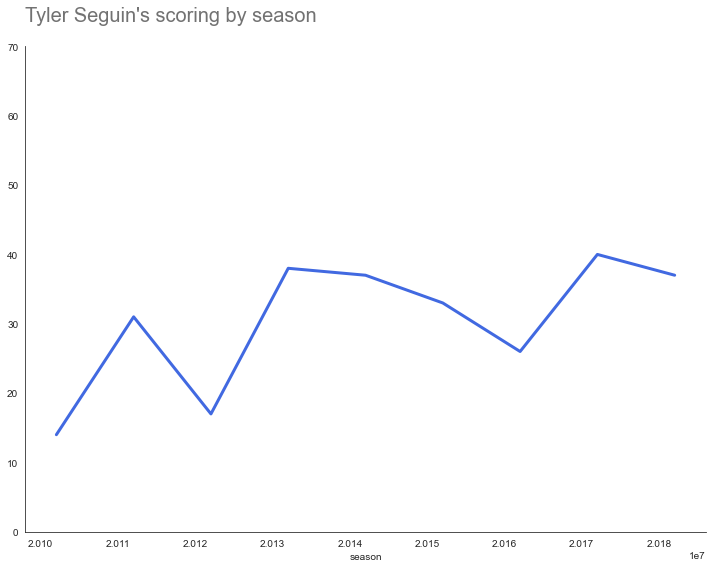

In [88]:
# sum total of goals by player
print(f"TOP 5- Total goals by player:\n{game_skater_stats.groupby(['player_name'])['goals'].sum().nlargest()} \n\n")

# total goals per season
print(f"Total goals per season:\n{game_skater_stats.groupby(['player_name','season'])['goals'].sum().nlargest(10)}\n")

# player number of goals performance through seasons
player_name = input("Select a player (full name): ")

player_goal_performance = game_skater_stats[game_skater_stats['player_name']== player_name]
print(f"\n{player_name}'s scoring performance per:\n{player_goal_performance.groupby(['season'])['goals'].sum()}")

# plotting
fig, ax = plt.subplots(figsize=(10, 8))
player_goal_performance.groupby(['season'])['goals'].sum().plot(ax=ax, linewidth=3, c='royalblue')
# titles
ax.set_title(player_name +"'s scoring by season", loc='left', fontsize=20, pad=25, alpha=0.65)

# styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0,70)

plt.tight_layout()

### Assists

Total assists by players:
player_name
Sidney Crosby        515
Nicklas Backstrom    505
Claude Giroux        504
Ryan Getzlaf         482
Patrick Kane         478
Name: assists, dtype: int64

Total assists per season:
player_name       season  
Henrik Sedin      20102011    94
Nikita Kucherov   20182019    89
Blake Wheeler     20172018    86
Joe Thornton      20152016    81
Brad Marchand     20182019    78
Brent Burns       20182019    78
Martin St. Louis  20102011    78
Evgeny Kuznetsov  20172018    76
Sidney Crosby     20132014    76
Blake Wheeler     20182019    75
Name: assists, dtype: int64


Type name of the player (full name): Tyler Seguin

Tyler Seguin performance:  
 season
20102011    15
20112012    39
20122013    23
20132014    49
20142015    40
20152016    40
20162017    46
20172018    38
20182019    54
Name: assists, dtype: int64



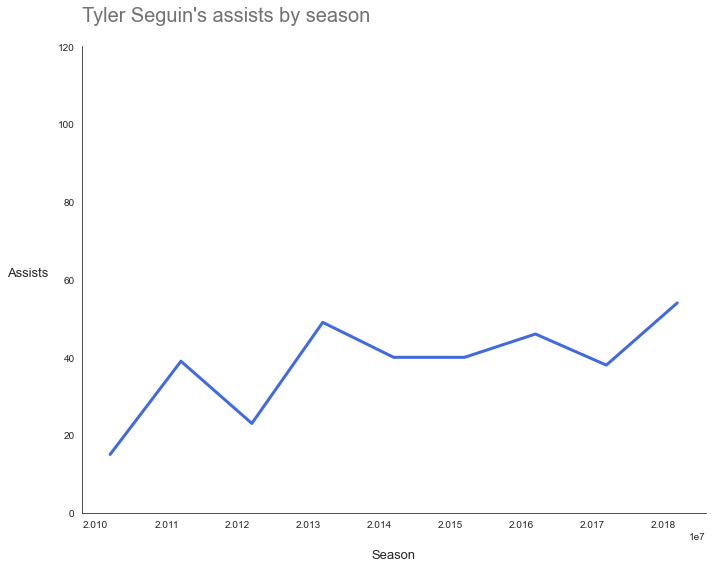

In [89]:
# sum total of assists by player
print(f"Total assists by players:\n{game_skater_stats.groupby(['player_name'])['assists'].sum().nlargest()}\n")

# total assist per season
print(f"Total assists per season:\n{game_skater_stats.groupby(['player_name','season'])['assists'].sum().nlargest(10)}\n\n")


# select player name 
player_name = input("Type name of the player (full name): ")

player_assists_performance = game_skater_stats[game_skater_stats['player_name']== player_name]
print(f"\n{player_name} performance:  \n {player_assists_performance.groupby(['season'])['assists'].sum()}\n")

# plotting
fig, ax = plt.subplots(figsize=(10, 8))
player_assists_performance.groupby(['season'])['assists'].sum().plot(ax=ax, linewidth=3, c='royalblue')
# title
ax.set_title(player_name + "'s assists by season", loc='left', fontsize=20, pad=25, alpha=0.65)
ax.set_ylabel("Assists", fontsize=13, rotation=0, labelpad=30)
ax.set_xlabel("Season", fontsize=13, labelpad=20)
# styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0,120)

plt.tight_layout()

### Points


Total points by players:
player_name
Sidney Crosby    814
Patrick Kane     789
Alex Ovechkin    768
Claude Giroux    727
Evgeni Malkin    716
Name: points, dtype: int64

Total player points per season:
player_name       season  
Nikita Kucherov   20182019    130
Daniel Sedin      20102011    124
Brad Marchand     20182019    123
Martin St. Louis  20102011    119
Evgeni Malkin     20112012    117
Nikita Kucherov   20172018    117
Connor McDavid    20182019    116
Henrik Sedin      20102011    116
Sidney Crosby     20162017    116
Evgeny Kuznetsov  20172018    115
Name: points, dtype: int64


Type name of the player (full name): Tyler Seguin

Tyler Seguin performance:  
 season
20102011    29
20112012    70
20122013    40
20132014    87
20142015    77
20152016    73
20162017    72
20172018    78
20182019    91
Name: points, dtype: int64



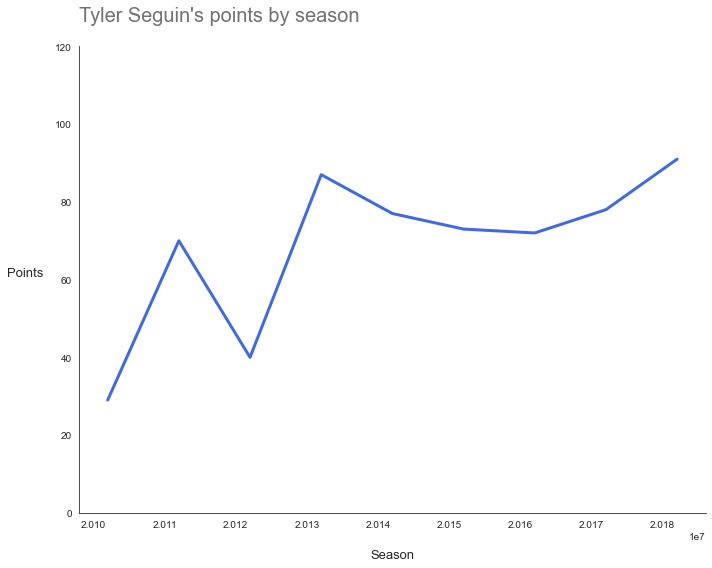

In [90]:
# sum total of assists by player
print(f"Total points by players:\n{game_skater_stats.groupby(['player_name'])['points'].sum().nlargest()}\n")

# total assist per season
print(f"Total player points per season:\n{game_skater_stats.groupby(['player_name','season'])['points'].sum().nlargest(10)}\n\n")


# select player name 
player_name = input("Type name of the player (full name): ")

player_points_performance = game_skater_stats[game_skater_stats['player_name']== player_name]
print(f"\n{player_name} performance:  \n {player_points_performance.groupby(['season'])['points'].sum()}\n")

# plotting
fig, ax = plt.subplots(figsize=(10, 8))
player_points_performance.groupby(['season'])['points'].sum().plot(ax=ax, linewidth=3, c='royalblue')
# title
ax.set_title(player_name + "'s points by season", loc='left', fontsize=20, pad=25, alpha=0.65)
ax.set_ylabel("Points", fontsize=13, rotation=0, labelpad=30)
ax.set_xlabel("Season", fontsize=13, labelpad=20)
# styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0,120)

plt.tight_layout()

# Conjunto de dados *game_plays* e *game_plays_players*

In [47]:
# carregando conjunto de dados em blocos
game_plays = pd.read_csv("nhl_datasets/game_plays.csv", chunksize=5000)

chunk_list = []  # lista que vai armazenar os blocos

# iterar sobre os blocos
for chunk in game_plays:
    
    # armazenando os blocos
    chunk_list.append(chunk)

# concatenando os blocos
game_plays = pd.concat(chunk_list)


In [48]:
# carregando conjunto de dados em blocos
game_plays_players = pd.read_csv("nhl_datasets/game_plays_players.csv", chunksize=5000)

chunk_list = []  # lista que vai armazenar os blocos

# iterar sobre os blocos
for chunk in game_plays_players:
    
    # armazenando os blocos
    chunk_list.append(chunk)

# concatenando os blocos
game_plays_players = pd.concat(chunk_list)

## Relacionando os conjunto de dados
Vamos unir os dois conjuntos de dados na variavel comum `play_id`

In [49]:
plays = pd.merge(game_plays, game_plays_players[['player_id', 'play_id']], on='play_id')

In [50]:
# visualizando o conjunto de dados
plays.sample(3)

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side,player_id
3177026,2015020015_80,2015020015,80,2.0,16.0,Faceoff,NaN,69.0,-22.0,1,REGULAR,694,506,2015-10-10 00:07:38,0,0,Frans Nielsen faceoff won against Jonathan Toews,-69.0,22.0,left,8470144
2619792,2016020514_169,2016020514,169,20.0,23.0,Faceoff,NaN,0.0,0.0,2,REGULAR,1087,113,2016-12-24 03:33:11,1,3,Sam Bennett faceoff won against Bo Horvat,0.0,0.0,left,8477500
3745621,2018020370_198,2018020370,198,14.0,24.0,Shot,Backhand,76.0,14.0,3,REGULAR,46,1154,2018-11-28 02:25:18,1,1,Ryan Callahan Backhand saved by Ryan Miller,76.0,14.0,left,8468011


## Funcoes


In [51]:
# funcao que retorna id do jogador
def return_id(name):
    # dict que relaciona o nome ao numero id
    name_id = player_info.set_index('player_name')['player_id'].to_dict()
    
    # armazena o id do jogador escolhido
    id_player = name_id[player_name]
    
    # retorn o id do jogador
    return id_player
    

## Hits

Select the player (full name): Tyler Seguin

Tyler Seguin hits per season:
season
20102011    30
20112012    30
20122013    59
20132014    54
20142015    63
20152016    84
20162017    60
20172018    74
20182019    92
Name: hits, dtype: int64


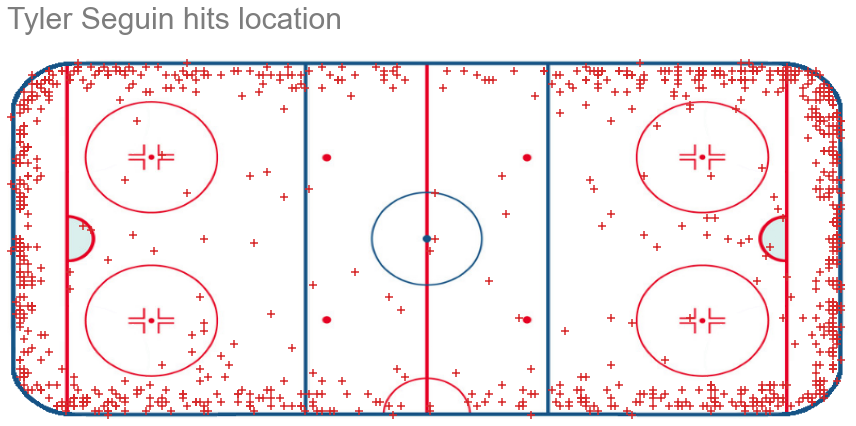

In [92]:
# subset with hits
hits = plays[plays['event']=="Hit"]

# seleciona o jogador
player_name = input("Select the player (full name): ")

# subset com os dados do jogador selecionado
hits = hits[(hits['player_id']== return_id(player_name))]

# apresentando o numero de hits do jogador selecionado
player_hits = game_skater_stats[game_skater_stats['player_name']== player_name].groupby(['season'])['hits'].sum()
print(f"\n{player_name} hits per season:\n{player_hits}")

# plottando local do hit
img = plt.imread('images/rink2.png')
fig, ax = plt.subplots(figsize=(12, 14)) # criando figura
ax.imshow(img, extent=[-100, 101, -42.95, 42.95])
hits.plot.scatter(x='x',y='y',s=50, marker='+', c='tab:red', ax=ax)
ax.set_title(player_name + " hits location", fontsize=30, loc='left', pad=30, alpha=0.6)

plt.axis(False)
plt.tight_layout()

## Distribuicao Penalties

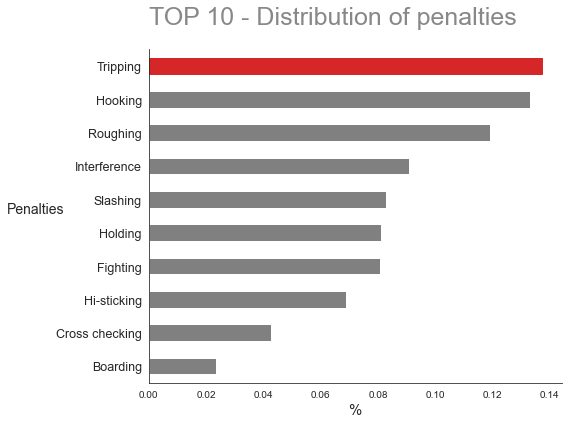

In [93]:
# dataframe contendo eventos de penalidade
penalties = plays[plays['event']=="Penalty"]

# list with name of all penalties
penalties_list = list(penalties['secondaryType'].unique())

# showing the top 10 penalties
penalties['secondaryType'].value_counts(normalize=True).nlargest(10)

# plotting the result
fig, ax = plt.subplots(figsize=(8, 6))
penalties['secondaryType'].value_counts(normalize=True).nlargest(10).sort_values(ascending=True).plot(kind='barh',
                                                                                                      color='grey',
                                                                                                      ax=ax)
# ediiting title and labels
ax.set_title("TOP 10 - Distribution of penalties", fontsize=25, pad=25, alpha=0.55, loc='left')
ax.set_ylabel("Penalties", fontsize=14, rotation=0, labelpad=20)
ax.set_xlabel("%", fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12.5)

# plot styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.patches[9].set_color("tab:red")

plt.tight_layout()

In [54]:
print(penalties_list)

['Slashing', 'Roughing', 'Hooking', 'Tripping', 'Holding', 'Delaying Game - Puck over glass', 'Cross checking', 'Misconduct', 'Interference', 'Elbowing', 'Holding the stick', 'Hi-sticking', 'Interference - Goalkeeper', 'Boarding', 'Illegal check to head', 'Fighting', 'Too many men on the ice', 'Charging', 'Hi stick - double minor', 'Game misconduct', 'Unsportsmanlike conduct', 'Diving', 'Checking from behind', 'Kneeing', 'Clipping', 'PS - Slash on breakaway', 'Closing hand on puck', 'Instigator', 'Instigator - face shield', 'Face-off violation', 'PS - Tripping on breakaway', 'Abuse of Officials', 'Delay of game', 'Match penalty', 'Delay Gm - Face-off Violation', 'Delaying the game', 'Abusive language', 'Embellishment', 'Concealing puck', 'PS - Covering puck in crease', 'Spearing', 'Throwing stick', 'PS - Hooking on breakaway', 'Major', 'PS - Holding on breakaway', 'Spearing - double minor', 'Delaying Game - Smothering puck', 'Broken stick', 'Delaying Game - Illegal play by goalie', 'In

## Penalties Locations


Select a penalty: Charging


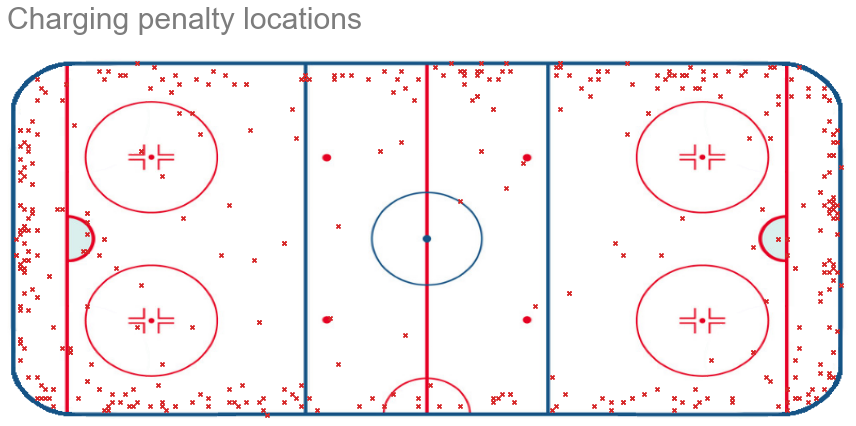

In [94]:
# loading rink img
img = plt.imread('images/rink2.png')
fig, ax = plt.subplots(figsize=(12, 14)) # creating figure
ax.imshow(img, extent=[-100, 101, -43, 43])# setting limits for img
penalty = input("Select a penalty: ") # user choice
# for loop for
for item in penalties_list:
    if penalty == item:
        penalties[penalties['secondaryType']== penalty].plot.scatter(x='x',y='y',s=15,
                                                                     marker='x', c='tab:red',
                                                                     ax=ax)
        
ax.set_title(penalty + " penalty locations", fontsize=30, loc='left', pad=30, alpha=0.6)
plt.axis(False)
plt.tight_layout()

## Distribuicao dos tipos de chutes que resultam em gols

Shot Style distribution:
Wrist Shot     0.492171
Snap Shot      0.148207
Slap Shot      0.121840
Backhand       0.098824
Tip-In         0.098694
Deflected      0.032694
Wrap-around    0.007571
Name: secondaryType, dtype: float64


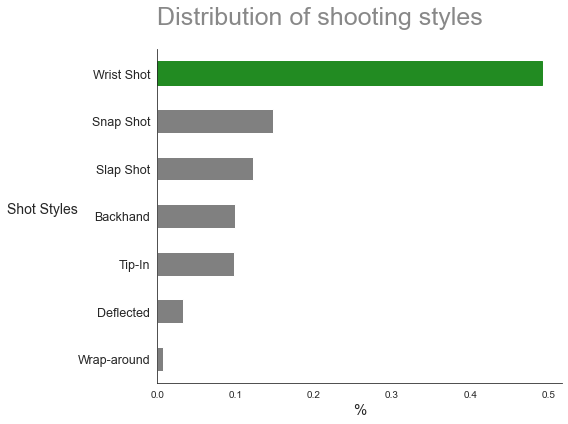

In [56]:
# dataset with all events tha result in goal
all_shots = plays[plays['event']=="Goal"]

# showing distribution of the styles of shot 
print(f"Shot Style distribution:\n{all_shots['secondaryType'].value_counts(normalize=True)}")

# lista com os estilos
shots_list = list(all_shots['secondaryType'].unique())
shots_list.remove(np.nan)

# plotting the distribution
fig, ax = plt.subplots(figsize=(8, 6))
all_shots['secondaryType'].value_counts(normalize=True).sort_values().plot(kind='barh', color='grey', ax=ax)
ax.set_title("Distribution of shooting styles", fontsize=25, pad=25, alpha=0.55, loc='left')
ax.set_ylabel("Shot Styles", fontsize=14, rotation=0, labelpad=35)
ax.set_xlabel("%", fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.patches[6].set_color("forestgreen")

plt.tight_layout()

In [57]:
shots_list

['Wrist Shot',
 'Snap Shot',
 'Tip-In',
 'Slap Shot',
 'Backhand',
 'Deflected',
 'Wrap-around']

Select a type: Wrist Shot


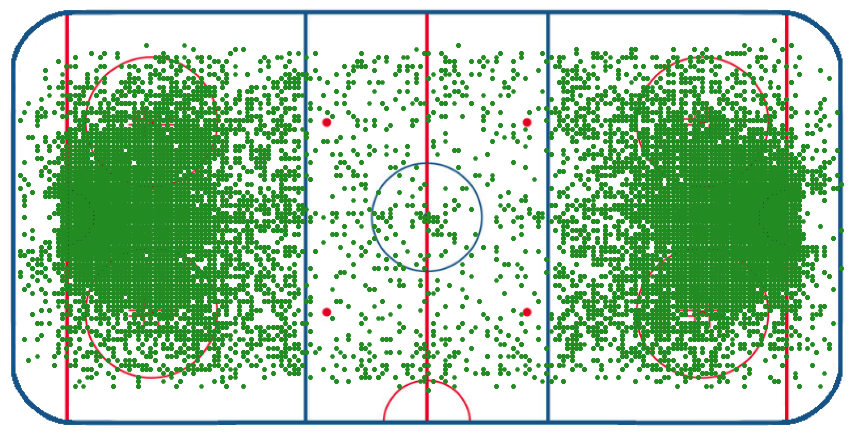

In [83]:
img = plt.imread('images/rink2.png')
fig, ax = plt.subplots(figsize=(12, 14))
ax.imshow(img, extent=[-100, 100, -50, 50])
shot_name = input("Select a type: ")
all_shots[all_shots['secondaryType']== shot_name ].plot.scatter(x='x',y='y',s=15, marker='H', c='forestgreen', ax=ax)

plt.axis(False)
plt.tight_layout()

## Distribuicao do estilo de tiro do jogador

Select the player (full name): Steven Stamkos

Steven Stamkos goals: 342

shooting style distribution
Wrist Shot     0.442478
Slap Shot      0.238938
Snap Shot      0.138643
Tip-In         0.088496
Backhand       0.073746
Wrap-around    0.008850
Deflected      0.008850
Name: shot_type, dtype: float64


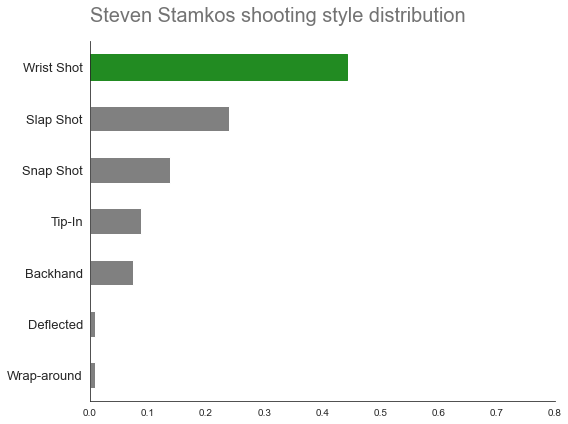

In [84]:
# seleciona o jogador
player_name = input("Select the player (full name): ")

# subset com os dados do jogador selecionado para evento de gol
player_shots_goals = plays[(plays['player_id'] == return_id(player_name) ) & (plays['event'] == 'Goal')].copy()

# subset com os dados do jogador selecionado para evento de missed shot
player_missed_shots = plays[(plays['player_id'] == return_id(player_name) ) & (plays['event'] == 'Missed Shot')].copy()

# add coluna que indica onde jogador fez o gol
player_shots_goals['goal'] = player_shots_goals.apply(lambda x : 1 if (x['description'].startswith(player_name)) else 0, axis=1)

# substituindo player_id pelo nome do jogador
player_shots_goals['player_id'].replace(player_dict, inplace=True)

# filtrando colunas e renomeando
player_shots_goals = player_shots_goals[['game_id','player_id','goal', 'secondaryType',
                             'periodType','x','y']].rename(columns={'player_id':'player_name',
                                                                    'secondaryType':'shot_type',})


# total of goals player
print(f"\n{player_name} goals: {game_skater_stats[game_skater_stats['player_name'] == player_name]['goals'].sum()}\n")
print("shooting style distribution")
# porcentagem do estilo de shot
print(player_shots_goals[player_shots_goals['goal']==1]['shot_type'].value_counts(normalize=True))
# criando lista com os estilos de shot
shots_list = list(player_shots_goals[player_shots_goals['goal']==1]['shot_type'].value_counts(normalize=True).index)

# criando figura que vai apresentar a distribuicao
fig, ax = plt.subplots(figsize=(8, 6))
player_shots_goals[player_shots_goals['goal']==1]['shot_type'].value_counts(normalize=True).sort_values().plot(kind='barh',
                                                                                                               color='grey',
                                                                                                               ax=ax)
ax.set_title(player_name + " shooting style distribution",loc='left', pad=20,
             fontsize=20,c='black', alpha=0.55)

ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.patches[len(shots_list)-1].set_color('forestgreen') 
ax.set_xlim(0.0, 0.8)
plt.tight_layout()

## localizao shot que resultaram em gol e chutes errados

In [60]:
msg = "Select one of the styles ('Wrist Shot', 'Backhand', 'Snap Shot', 'Slap Shot', 'Tip-In', 'Deflected', 'Wrap-around') " 
msg += "and type below or 'all' to see all shots"
print(msg)

Select one of the styles ('Wrist Shot', 'Backhand', 'Snap Shot', 'Slap Shot', 'Tip-In', 'Deflected', 'Wrap-around') and type below or 'all' to see all shots


Type here: Wrist Shot


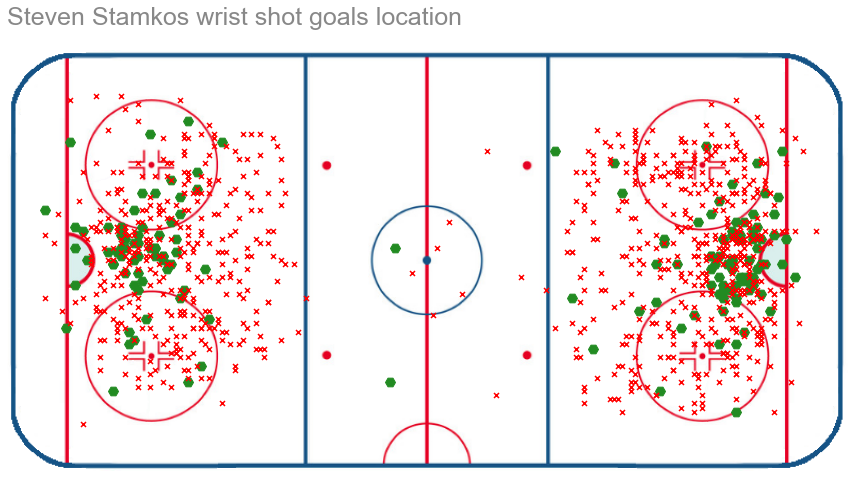

In [85]:
# filtrando pelos gols feitos
goal_spot = player_shots_goals[player_shots_goals['goal']==1]
# plottando onde aconteceram os gols
img = plt.imread('images/rink2.png')
fig, ax = plt.subplots(figsize=(12, 14))
ax.imshow(img, extent=[-100, 100, -50, 50])
shot_type = input("Type here: ")
for shot_style in shots_list:
    if shot_type == shot_style:
        goal_spot[goal_spot['shot_type']== shot_type].plot.scatter(x='x', y='y',s=100, marker='H', c='forestgreen', ax=ax)
        ax.set_title(player_name + " " + shot_type.lower() + " goals location", fontsize=25,
                     loc='left',alpha=0.55, pad=25)
        player_missed_shots.plot.scatter(x="x", y="y", s=25, c='red', marker='x', ax=ax)
        
    if shot_type == 'all':
        goal_spot.plot.scatter(x='x', y='y',s=100, marker='H', c='forestgreen', ax=ax)
        ax.set_title(player_name + " " + shot_type.lower() + " goals location", fontsize=25,
                     loc='left',alpha=0.55, pad=25)
        player_missed_shots.plot.scatter(x="x", y="y", s=25, c='red', marker='x', ax=ax)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.axis('off')
plt.tight_layout()